# Modelling the recovery process using probability

Recall code from last time for $I_{n+1} = (1 + c) I_n = \lambda * I_n$:

In [3]:
function run_infection(I_0, λ, T=20)  # T=20 is default value

    I = zeros(T)
    I[1] = I_0

    for n in 1:T-1
        I[n+1] = λ * I[n]  
    end

    return I
end

run_infection (generic function with 3 methods)

In [6]:
run_infection(1.0, 0.1);

## Adding new data to extend a vector

In [7]:
v = [1.0]

1-element Array{Float64,1}:
 1.0

In [8]:
push!(v, 7.0)  # ! means: function `push!` modifies its first argument

2-element Array{Float64,1}:
 1.0
 7.0

In [10]:
length(v)

2

In [14]:
a = 1

v[3]

BoundsError: BoundsError: attempt to access 2-element Array{Float64,1} at index [3]

In [15]:
v

2-element Array{Float64,1}:
 1.0
 7.0

In [16]:
[v; 10]

3-element Array{Float64,1}:
  1.0
  7.0
 10.0

In [17]:
v

2-element Array{Float64,1}:
 1.0
 7.0

In [18]:
v2 = [v; 10]

3-element Array{Float64,1}:
  1.0
  7.0
 10.0

In [19]:
v2 = copy(v)

3-element Array{Float64,1}:
  1.0
  7.0
 10.0

In [22]:
function run_infection(I_0, λ, T=20)  # T=20 is default value

    Is = [I_0]
    
    I = I_0   # current value of I

    for n in 1:T-1
        I_next = λ * I
        
        push!(Is, I_next)
    end

    return Is
end

run_infection (generic function with 3 methods)

In [23]:
run_infection(1.0, 1.1)

20-element Array{Float64,1}:
 1.0
 1.1
 1.1
 1.1
 1.1
 1.1
 1.1
 1.1
 1.1
 1.1
 1.1
 1.1
 1.1
 1.1
 1.1
 1.1
 1.1
 1.1
 1.1
 1.1

In [25]:
function run_infection(I_0, λ, T=20)  # T=20 is default value

    Is = [I_0]
    I = I_0   # current value of I

    for n in 1:T-1
        I_next = λ * I
        
        push!(Is, I_next)
        
        I = I_next
    end
    
    return Is
end

run_infection (generic function with 3 methods)

In [26]:
run_infection(1.0, 1.1)

20-element Array{Float64,1}:
 1.0
 1.1
 1.2100000000000002
 1.3310000000000004
 1.4641000000000006
 1.6105100000000008
 1.771561000000001
 1.9487171000000014
 2.1435888100000016
 2.357947691000002
 2.5937424601000023
 2.853116706110003
 3.1384283767210035
 3.4522712143931042
 3.797498335832415
 4.177248169415656
 4.594972986357222
 5.054470284992944
 5.559917313492239
 6.115909044841463

In [27]:
v

3-element Array{Float64,1}:
  1.0
  7.0
 10.0

In [28]:
pushfirst!(v, 8)   # deque - double-ended queue

4-element Array{Float64,1}:
  8.0
  1.0
  7.0
 10.0

## Randomness

In [29]:
r = rand()

0.6254465754499758

In [30]:
r = rand()

0.9251027927183173

In [31]:
using Random

In [33]:
Random.seed!(3);

In [34]:
r = rand()

0.8116984049958615

In [35]:
r = rand()

0.9884323655013432

In [36]:
Random.seed!(3);  # mechanism to get repeatable sequences of random numbers

In [37]:
r = rand()

0.8116984049958615

In [38]:
r = rand()

0.9884323655013432

In [39]:
rand(10)

10-element Array{Float64,1}:
 0.8076220876500786
 0.9700908450487538
 0.14006111319509862
 0.5094438024440222
 0.05869740597593154
 0.004257960600515309
 0.9746379934512355
 0.5572251384524507
 0.4644219211852372
 0.2875090558291695

In [40]:
using Plots

In [44]:
r = rand(50);

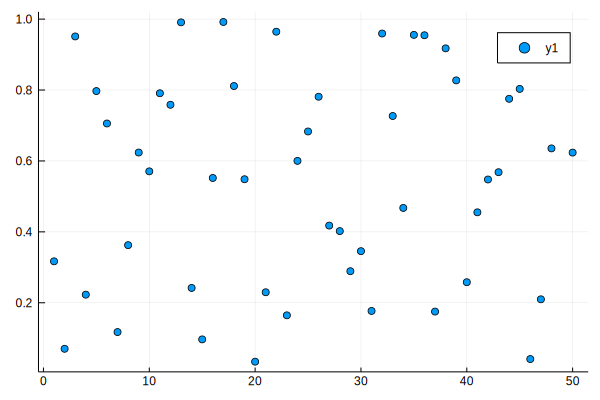

In [45]:
scatter(r)

In [47]:
one(0.5)

1.0

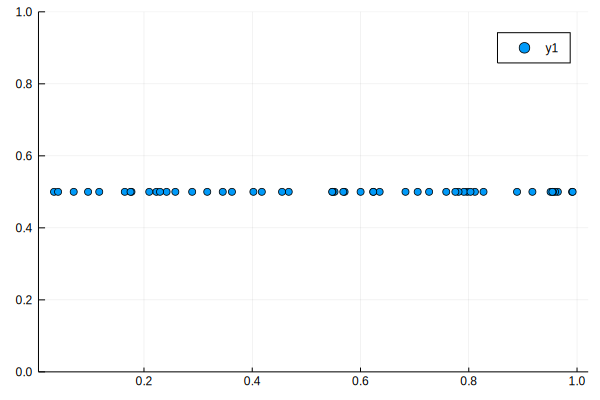

In [48]:
scatter(r, 0.5 .* one.(r), ylim=(0, 1))

In [52]:
using Interact

num_points = 100
r = rand(num_points)

@manipulate for n in 1:num_points
    scatter(r[1:n], 0.5 .* one.(r[1:n]), ylim=(0, 1), xlim=(0, 1))
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["n"], Dict{Symbol,Any}(:className => "interact ",:style => Dict{Any,Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol,Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(:max => 100,:min => 1,:attributes => Dict{Any,Any}(:type => "range",Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient" => "horizontal"),:step => 1,:className => "slider slider is-fullwidth",:style => Dict{Any,Any}()))], Dict{Symbol,Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol,Any}(:className => "interact-flex-row-right"))], Dict{Symbol,Any}(:className => "interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing),"index" => (Observable{Int64} with 2 listeners. Value:
50, nothing)), Set(String[]), nothing, Asset[Asset("js", "knockout", "/Users/dpsanders/.julia/packages/Knockout/IP1uR/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/Users/dpsanders/.julia/packages/Knockout/IP1uR/src/../assets/knockout_punches.js"), Asset("js", nothing, "/Users/dpsanders/.julia/packages/InteractBase/9mFwe/src/../assets/all.js"), Asset("css", nothing, "/Users/dpsanders/.julia/packages/InteractBase/9mFwe/src/../assets/style.css"), Asset("css", nothing, "/Users/dpsanders/.julia/packages/Interact/cdOnS/src/../assets/bulma_confined.min.css")], Dict{Any,Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set(AbstractConnection[]), Base.GenericCondition{Base.AlwaysLockedST}(Base.InvasiveLinkedList{Task}(Task (runnable) @0x00000001342ec6d0, Task (runnable) @0x00000001342ec6d0), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"1\",\"2\",\"3\",\"4\",\"5\",\"6\",\"7\",\"8\",\"9\",\"10\",\"11\",\"12\",\"13\",\"14\",\"15\",\"16\",\"17\",\"18\",\"19\",\"20\",\"21\",\"22\",\"23\",\"24\",\"25\",\"26\",\"27\",\"28\",\"29\",\"30\",\"31\",\"32\",\"33\",\"34\

## Event with probability $p$

In [71]:
p = 0.25
r = rand()

if r < p
    true
else
    false
end

false

"Bernoulli trial"

In [72]:
function bernoulli(p)

    r = rand()

    if r < p
        return true
    else
        return false
    end
end

bernoulli (generic function with 1 method)

In [73]:
r < p ? true : false   # ternary operator

false

In [74]:
r < p

false

In [75]:
function bernoulli(p)

    r = rand()

    return r < p
end

bernoulli (generic function with 1 method)

In [80]:
p = 0.25
trials = [bernoulli(p) for i in 1:100];


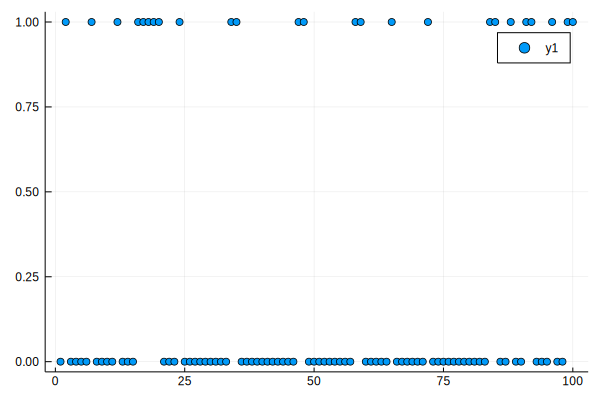

In [81]:
scatter(trials)

In [84]:
count(trials)

25

In [86]:
trials = [bernoulli(p) for i in 1:100];
count(trials)

29

In [99]:
trials = [bernoulli(p) for i in 1:100];
count(trials)

30

In [106]:
function bernoulli_experiment(p, N=100)
    trials = [bernoulli(p) for i in 1:N];
    return count(trials)
end

bernoulli_experiment (generic function with 2 methods)

In [103]:
count(trials .== false) + count(trials)

100

In [104]:
count(.!(trials))  # ! is not

70

In [107]:
bernoulli_experiment(0.25)

29

In [108]:
bernoulli_experiment(0.25)

33

A function which has different **outcomes** in different runs is called a **random variable**

## Monte Carlo simulation

Run the same random process a lot of times and look at the results

In [113]:
p = 0.25
N = 20   # num of trials
num_expts = 100 

results = [bernoulli_experiment(p, N) for i in 1:num_expts]

100-element Array{Int64,1}:
 3
 5
 7
 6
 4
 3
 4
 4
 6
 5
 7
 1
 3
 ⋮
 7
 7
 8
 5
 5
 4
 2
 5
 6
 4
 4
 4

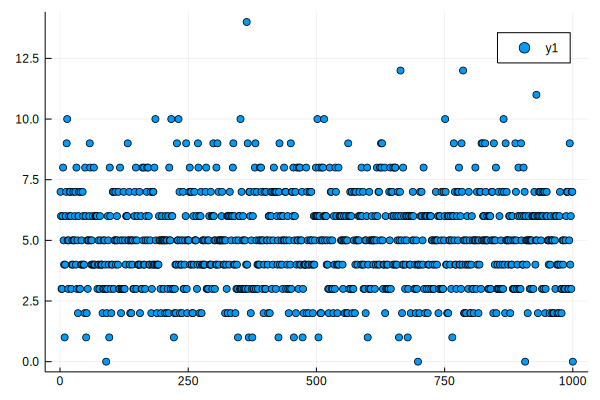

In [115]:
num_expts = 1000
results = [bernoulli_experiment(p, N) for i in 1:num_expts]
scatter(results)

$X$ = number of heads

**Probability distribution** of a random variable $X$

$\text{Prob}(X = x)$

Probability that $X = x$ = proportion of time that the result was $x$

## Counting

Need to count how many of the trials come out as 5

Need data structure where we store the counts:
- `Dict` (dictionary)
- `Vector`

In [118]:
results

1000-element Array{Int64,1}:
 7
 6
 3
 3
 6
 8
 5
 4
 1
 4
 6
 7
 9
 ⋮
 7
 7
 3
 3
 5
 9
 4
 6
 3
 7
 7
 0

In [119]:
maximum(results)   # not `max`:   max(1, 2, 3)

14

In [120]:
minimum(results)

0

In [121]:
l = maximum(results) + 1  # +1 is to store 0

15

In [123]:
counts = zeros(l);

In [124]:
for score in results[1:10]   # for i in 1:length(results)
    @show score
end

score = 7
score = 6
score = 3
score = 3
score = 6
score = 8
score = 5
score = 4
score = 1
score = 4


In [125]:
for score in results
    counts[score + 1] += 1   # increment by 1
end

In [126]:
counts

15-element Array{Float64,1}:
   4.0
  15.0
  81.0
 150.0
 172.0
 210.0
 164.0
 112.0
  53.0
  26.0
   9.0
   1.0
   2.0
   0.0
   1.0

In [128]:
counts = zeros(Int, maximum(results) + 1)

for score in results
    counts[score + 1] += 1   # increment by 1
end

In [129]:
counts

15-element Array{Int64,1}:
   4
  15
  81
 150
 172
 210
 164
 112
  53
  26
   9
   1
   2
   0
   1

In [136]:
]add LaTeXStrings

   Updating registry at `~/.julia/registries/General`


   Updating git-repo `https://github.com/JuliaRegistries/General.git`


    Fetching: [======>                                  ]  

    Fetching: [===========

Fetching: [========================================>]  99.9 %>                    ]  48.1 % [=========================>               ]  61.5 % %>       ]  80.9 %======================================>  ]  94.3 %Fetching: [=======================================> ]  96.7 %

  Resolving package versions...
  Installed OpenBLAS_jll ─ v0.3.9+1
  Installed libass_jll ─── v0.14.0+1
  Installed XSLT_jll ───── v1.1.33+1
  Installed Arpack_jll ─── v3.5.0+3
######################################################################### 100.0%##O=#  #                                                                       
######################################################################### 100.0%##O=#  #                                                                       
######################################################################### 100.0%##O=#  #                                                                       
######################################################################### 100.0%##O=#  #                                                                       
   Updating `~/.julia/environments/v1.4/Project.toml`
  [b964fa9f] + LaTeXStrings v1.1.0
   Updating `~/.julia/environments/v1.4/Manifest.toml`
  [68821587] ↑ Arpack_jll v3.5.0+2 ⇒ v

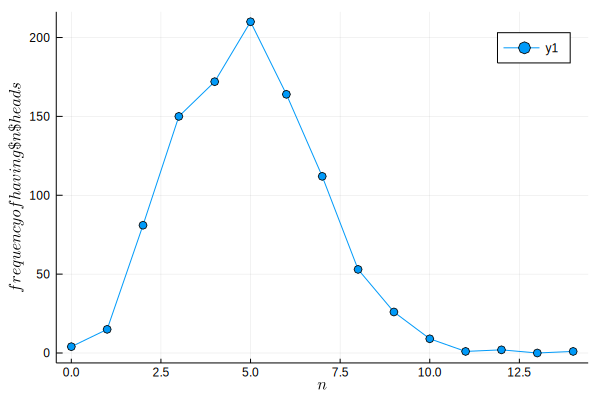

In [141]:
using LaTeXStrings

plot(0:maximum(results), counts, m=:o)
ylabel!(L"frequency of having $n$ heads")
xlabel!(L"n")

In [142]:
function count_them(results)

    counts = zeros(Int, maximum(results) + 1)

    for score in results
        counts[score + 1] += 1   # increment by 1
    end
    
    return counts
end

count_them (generic function with 1 method)

In [143]:
function run_experiments(p, N, num_expts=1000)
    results = [bernoulli_experiment(p, N) for i in 1:num_expts]
end

run_experiments (generic function with 2 methods)

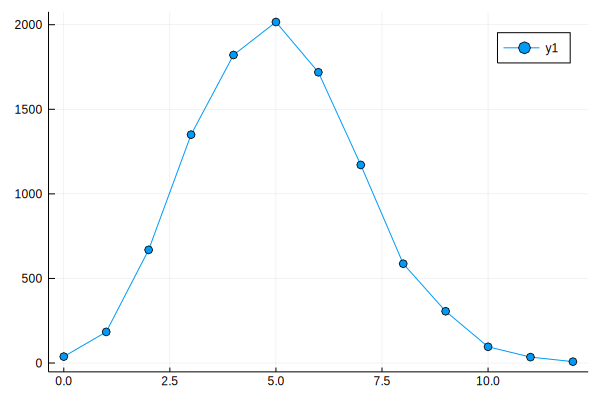

In [146]:
data = count_them(run_experiments(0.25, 20, 10000))
plot(0:length(data)-1, data, m=:o)

## Probability distribution

Probability = relative frequency

Divide by the number of experiments:

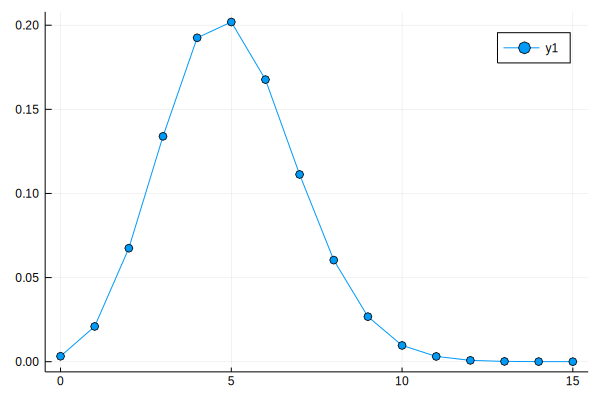

In [149]:
data = count_them(run_experiments(0.25, 20, 10^5))

plot(0:length(data)-1, data ./ sum(data), m=:o)

In [150]:
@time data = count_them(run_experiments(0.25, 20, 10^5))


  0.022058 seconds (100.00 k allocations: 11.444 MiB)


17-element Array{Int64,1}:
   301
  2144
  6744
 13534
 18964
 20304
 16759
 11255
  5977
  2614
  1013
   294
    80
    13
     3
     0
     1

In [151]:
@time data = count_them(run_experiments(0.25, 20, 10^6))

  0.243592 seconds (1.00 M allocations: 114.441 MiB, 7.54% gc time)


16-element Array{Int64,1}:
   3149
  21130
  67020
 134452
 189680
 201840
 168248
 112460
  60809
  27260
  10008
   3027
    720
    170
     26
      1

In [152]:
@time data = count_them(run_experiments(0.25, 20, 10^7))

  2.596961 seconds (10.00 M allocations: 1.118 GiB, 14.38% gc time)


17-element Array{Int64,1}:
   31698
  211771
  669302
 1339528
 1896565
 2022336
 1686423
 1124561
  608698
  271036
   98697
   30129
    7440
    1530
     253
      31
       2

In [153]:
num_expts = 10^5
data = count_them(run_experiments(0.25, 20, num_expts))

probs = data ./ num_expts

15-element Array{Float64,1}:
 0.00329
 0.02179
 0.06524
 0.13388
 0.19079
 0.20136
 0.16894
 0.11272
 0.06134
 0.0273
 0.00957
 0.00301
 0.0006
 0.00015
 2.0e-5

In [154]:
sum(probs)

0.9999999999999999

In [155]:
x = 3 // 4

3//4

In [156]:
typeof(x)

Rational{Int64}

In [157]:
x + x

3//2

In [158]:
probs = data .// num_expts

15-element Array{Rational{Int64},1}:
   329//100000
  2179//100000
  1631//25000
  3347//25000
 19079//100000
  2517//12500
  8447//50000
  1409//12500
  3067//50000
   273//10000
   957//100000
   301//100000
     3//5000
     3//20000
     1//50000

In [159]:
sum(probs)

1//1

In [160]:
data

15-element Array{Int64,1}:
   329
  2179
  6524
 13388
 19079
 20136
 16894
 11272
  6134
  2730
   957
   301
    60
    15
     2

In [161]:
mean(data)

UndefVarError: UndefVarError: mean not defined

In [162]:
using Statistics

In [167]:
results = run_experiments(0.25, 20, 10^5);

In [168]:
mean(results)  # N=20 trials, p=0.25   

5.00301

Expected mean value = N * p